In [1]:
from IPython.display import Image
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'

#### Levels of Measurement

|             |                    | Difference | Order  | Similar intervals | Meaningful zero point |
|-------------|--------------------|------------|--------|-------------------|-----------------------|
| Categorical | nominal<br>ordinal |   +<br>+   | -<br>+ |       -<br>-      |         -<br>-        |
| Quantitive  | interval<br>ratio  |   +<br>+   | +<br>+ |       +<br>+      |         -<br>+        |

- Quantitative variables can also be distinguished in **discrete** and **continuous** variables.
- A variable is discrete if it's possible categories form a set of separate numbers. 
    - For instance, the number of goals scored by a football player. A player can score, for instance, one goal or two goals, but not 1.21 goals.
- A variable is continuous if the possible values of the variable form an interval. An example is again, the height of a player.
    - Someone can be 170 centimeters, 171 centimeters tall. But also for instance, 170.2461 centimeters tall. We don't have a set of separate numbers, but an infinite region of values.

#### Data Types in Python

**Numerical or Quantitative (taking the mean makes sense)**
- Discrete
    - Integer (int)
    - Stored exactly
- Continuous
    - Float (float)
    - Stored similarly to scientific notation. Allows for decimal places but loses precision.

**Categorical or Qualitative**
- Nominal
    - Boolean (bool)
    - String (str)
    - None (NoneType)
- Ordinal
    - Only defined by how you use the data
    - Often important when creating visuals
    - Lists can hold ordinal information because they have indices

#### Quantitative Data: Histograms

**4 Main Aspects**
- **Shape:** Overall appearance of histogram. Can be symmetric, bell-shaped, left skewed, right skewed, etc.
- **Center:** Mean or median.
- **Spread:** How far our data spreads. Range, Interquartile Range (IQR), standard deviation, variance.
- **Outliers:** Data points that fall far from the bulk of the data.

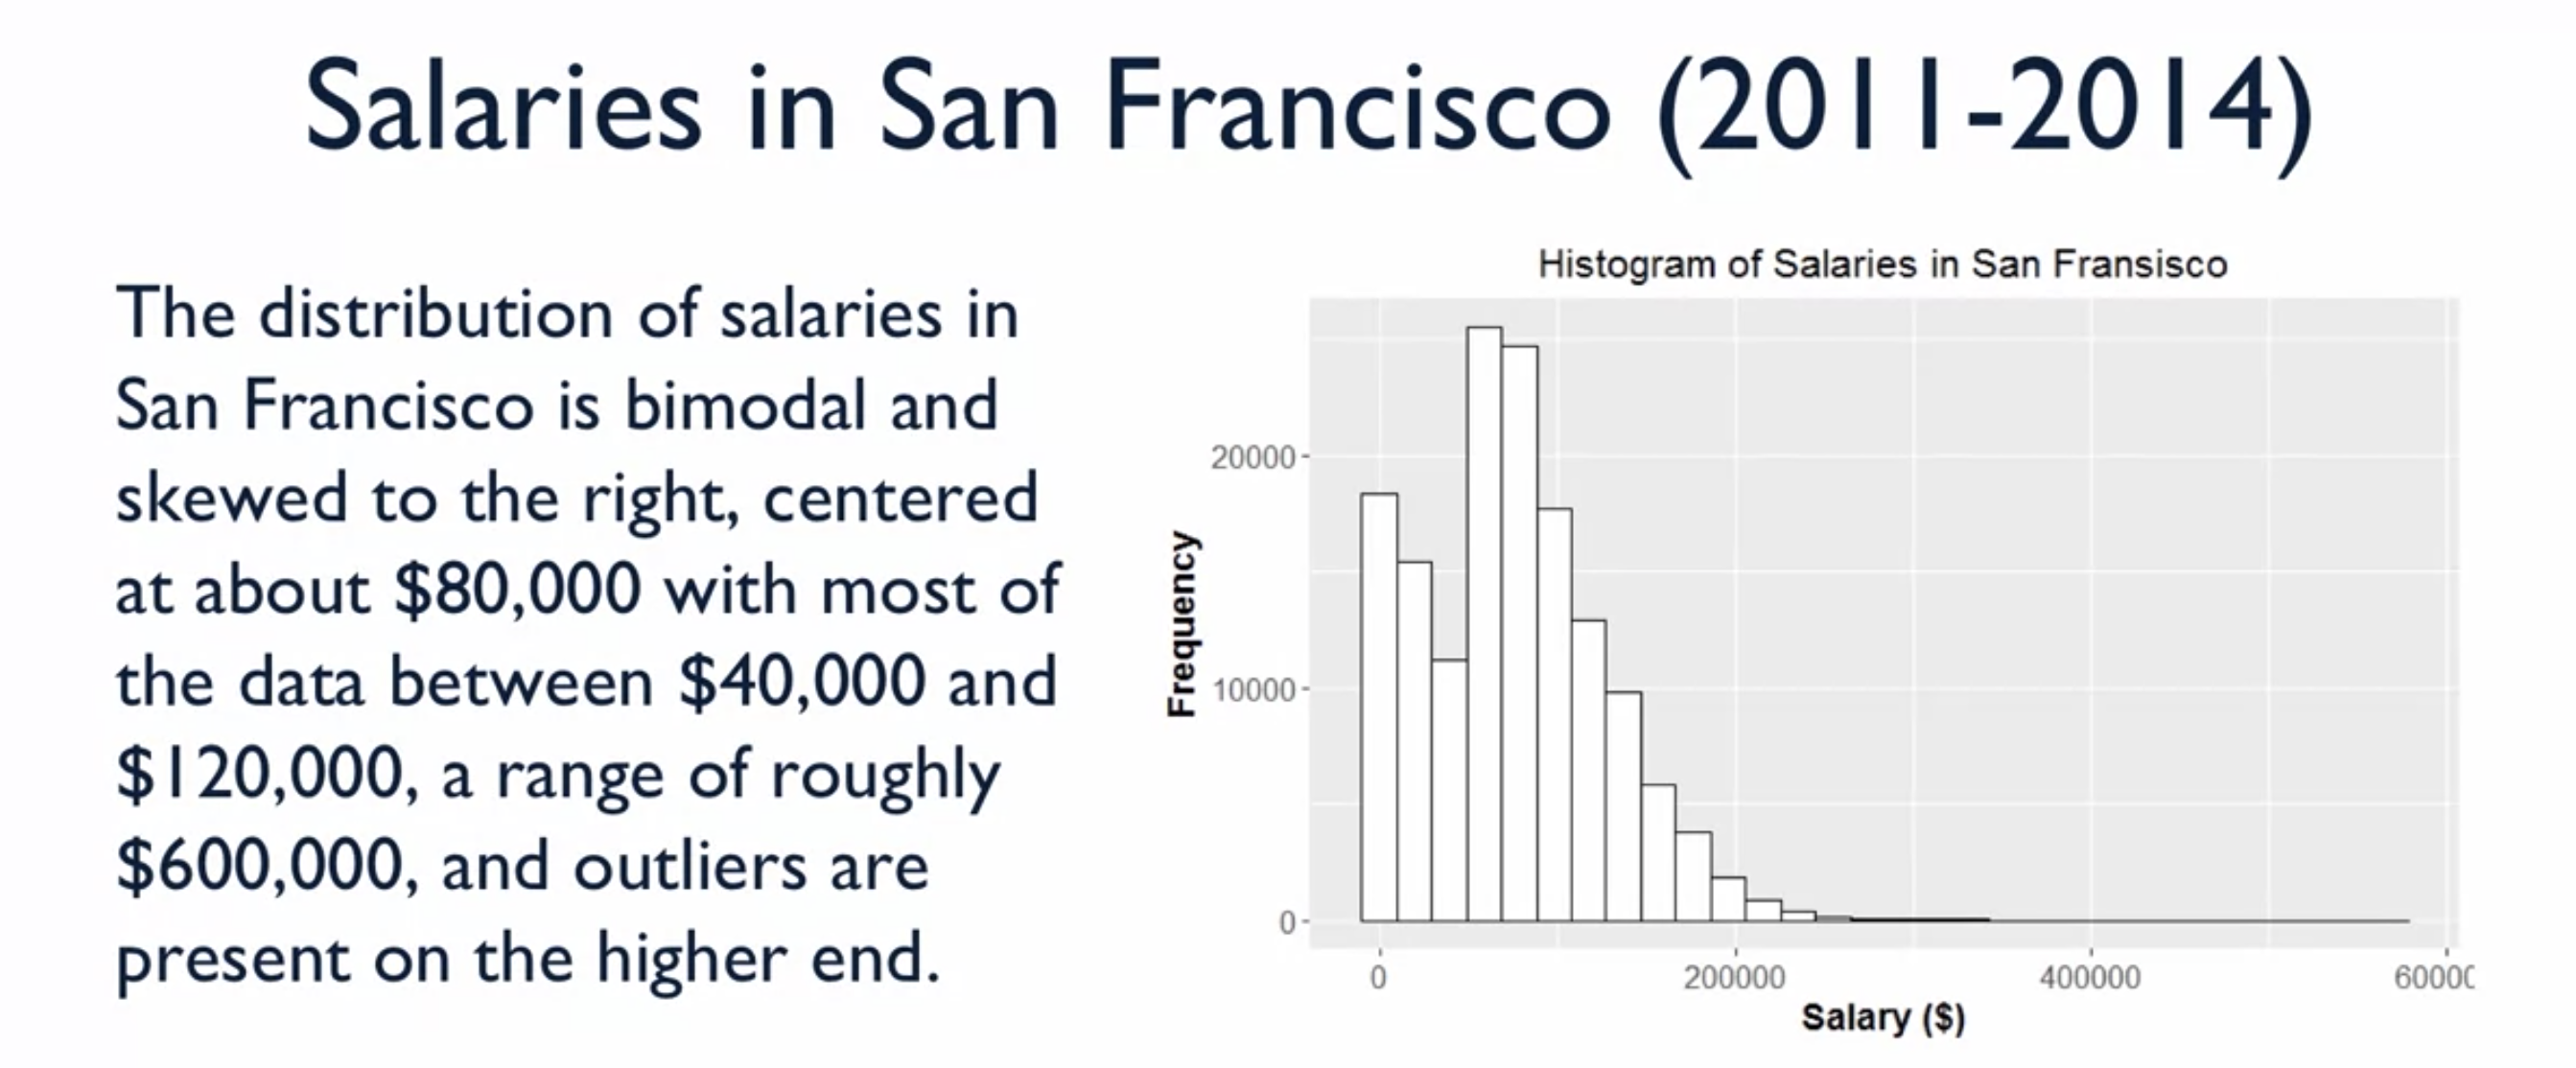

In [3]:
Image('images/example_1.png', width=600)

- unimodal: if the histogram has a peak
- bimodal: if the histogram has two peaks

- As you can see in the graph, it's right skewed distribution. So the mean value greater than the median value in this distrubution.
- We have outliers on the higher end and so that's pulling the mean towards it.
- **The median is what we call a robust estimate of the center, meaning it's not influenced by outliers.**

To summarize, generally if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

#### Empirical Rule (68-95-99.7 Rule)

The empirical rule, also referred to as the three-sigma rule or 68-95-99.7 rule, is a statistical rule which states that for a normal distribution, almost all observed data will fall within three standard deviations (denoted by σ) of the mean or average (denoted by µ).

In particular, the empirical rule predicts that 68% of observations falls within the first standard deviation (µ ± σ), 95% within the first two standard deviations (µ ± 2σ), and 99.7% within the first three standard deviations (µ ± 3σ).

In [4]:
mean = 7
standard_deviation = 1.7

In [5]:
# normal distribution
x = np.arange(1.5, 12.5, 0.5)
y = norm.pdf(x, mean, standard_deviation)

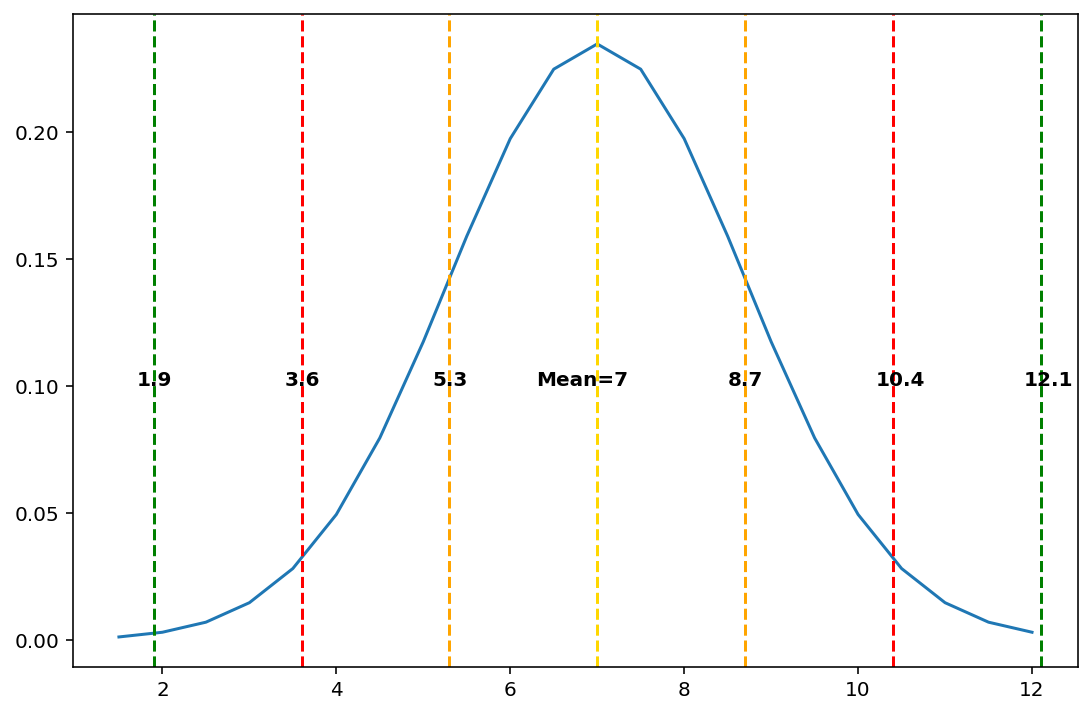

In [6]:
colors = ['orange', 'red', 'green']

plt.figure(figsize=(9, 6))

# bell curve
ax = plt.plot(x, y)

# mean line
plt.axvline(7, color='gold', linestyle='--')
plt.text(6.3, 0.1, 'Mean=7', fontweight='bold')

for i in range(1, 4):
    pos_line = round(mean + i * standard_deviation, 2)
    neg_line = round(mean - i * standard_deviation, 2)
    
    plt.axvline(pos_line, color=colors[i - 1], linestyle='--')
    plt.axvline(neg_line, color=colors[i - 1], linestyle='--')
    
    plt.text(pos_line - 0.2, 0.1, f'{pos_line}', fontweight='bold')
    plt.text(neg_line - 0.2, 0.1, f'{neg_line}', fontweight='bold')

In the graph above, you see a normal distribution of people's sleep times. In this data, the mean value is 7 and the standard deviation is 1.7. So, we can calculate the points for empirical rule.
- For the 68%,
    - mean + 1 * standart deviation = 8.7
    - mean - 1 * standart deviation = 5.3
- For the 95%,
    - mean + 2 * standart deviation = 3.6
    - mean - 2 * standart deviation = 10.4
- For the 99.7%,
    - mean + 3 * standart deviation = 1.9
    - mean - 3 * standart deviation = 12.1

For instance, I sleep 10 hours a day. Let's calculate the standard score (z-score) for me! Here is the formula,

**Z score = (Observation - Mean) / Standard Deviation**

In [7]:
z_score = (10 - mean) / standard_deviation
z_score

1.7647058823529411

Hmm! I sleep a little more than average. Let's take a look at a friend who sleeps 6 hours a day!

In [8]:
z_score = (6 - mean) / standard_deviation
z_score

-0.5882352941176471

This value is much less than me! And as you can see from the minus, this is slightly below average.

#### Pitfall: Simpson's Paradox

In this section, we’re going to introduce a Pitfall within Statistics: Simpson’s Paradox.

What if I told you that the rate of completing Course 2 after you’ve completed Course 1 of a Specialization is higher for males than for females?  What would you think?

Now, what if I told you that more males are enrolled in a full Specialization, while more females are interested in taking each course as a freestanding course?  Does that change how you think about the situation?

What might actually be happening is that there are different rates of Course 2 completion for those in the Specialization versus those taking freestanding courses, and that the gender ratio may also be different for those two situations. 

Let's take a look at the numbers:

|       | Specialization | Course      | Total       |
|-------|----------------|-------------|-------------|
| Men   | 55/70 (79%)    | 10/20 (50%) | 65/90 (72%) |
| Women | 25/30 (83%)    | 17/30 (57%) | 42/60 (70%) |
| Total | 80/100 (80%)   | 27/50 (54%) |             |

You may notice that the completion rate of Course 2 is higher for women within each of the methods of taking this course, but overall it appears that the completion rate of Course 2 is higher for men.  The way of taking courses hides the true direction of the relationship between gender and completion rate of Course 2.

The method of taking the course can be considered a **confounding variable**.  A confounding variable is an outside influence that changes the relationship between the independent and the dependent variable.  It oftentimes works by affecting the causal relationship between the primary independent variable and the dependent variable.  This confounding variable confuses the relationship between two other variables; it may act by hiding, obscuring, or enhancing the existing relationship. 

For example, suppose that you are interested in examining how activity level affects weight change.  Other factors, like diet, age, and gender may also affect weight change and come into play when looking at the relationship between activity level and weight change.  If one doesn’t control for these factors, the relationship between activity level and weight change can be distorted.

This also serves as a reminder that **Correlation does not imply Causation**.  There may be other factors involved with a causal relationship.  For this reason, you shouldn’t place too much stock in correlation alone.

[From pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#different-choices-for-indexing): 
* **[]** column indexing
* **.loc** is primarily label based, but may also be used with a boolean array.   
* **.iloc** is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.